In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

#Домашнее задание к лекции "Статистика. Практика"

##Задание 1
Вернемся к набору данных о видеоиграх
(https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv)

Ответьте на следующие вопросы:

-Как критики относятся к спортивным играм?

-Критикам нравятся больше игры на PC или на PS4?

-Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

-сформулируйте нулевую и альтернативную гипотезы;

-выберите пороговый уровень статистической значимости;

-опишите полученные результаты статистического теста.

In [ ]:
games = pd.read_csv('vgsales.csv')

In [ ]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Оставим токлько нужные нам столбцы и удалим пустые строки

In [ ]:
Critic_Score = games[['Genre','Critic_Score','Platform']]

In [ ]:
Critic_Score = Critic_Score[~Critic_Score['Critic_Score'].isna()]

In [ ]:
Critic_Score.isna().sum()

Genre           0
Critic_Score    0
Platform        0
dtype: int64

In [ ]:
Critic_Score_genre = Critic_Score.groupby('Genre').mean().sort_values('Critic_Score', ascending= False)

In [ ]:
Critic_Score_genre

,Critic_Score
Genre,
Role-Playing,72.652646
Strategy,72.086093
Sports,71.968174
Shooter,70.181144
Fighting,69.217604
Simulation,68.619318
Platform,68.058350
Racing,67.963612
Puzzle,67.424107


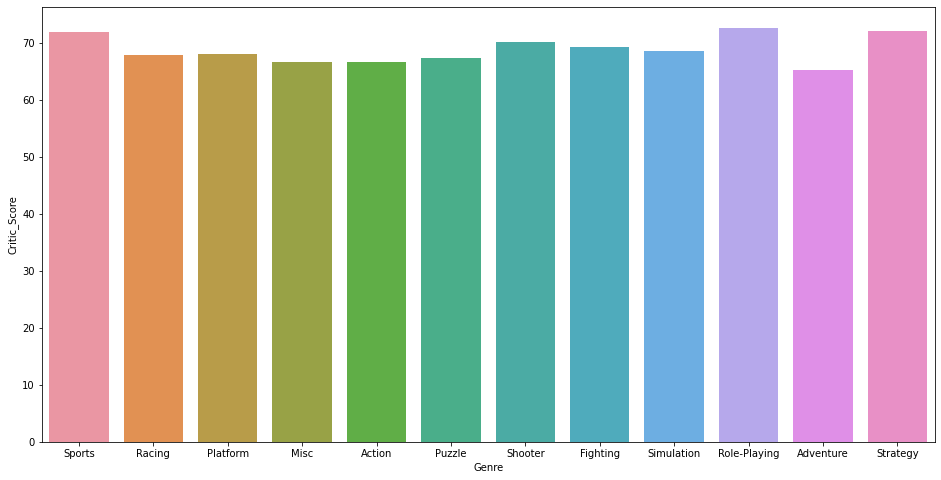

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=Critic_Score['Genre'], y=Critic_Score['Critic_Score'], ci=False,)

**Проанализируем как критики относятся к спортивным играм в сравнении со всеми остальными**

H0 Критики в среднем ставят такие же оценки жанру спорт как и всем остальным

H1 Критики в среднем ставят оценки жанру спорт отличную от остальных (выше или неже)

In [ ]:
Critic_Score_sport = Critic_Score[Critic_Score['Genre'] == 'Sports']

In [ ]:
Critic_Score_over = Critic_Score[~(Critic_Score['Genre'] == 'Sports')]

(array([  7.,  11.,  31.,  53.,  91., 153., 231., 345., 232.,  40.]),
 array([19. , 26.9, 34.8, 42.7, 50.6, 58.5, 66.4, 74.3, 82.2, 90.1, 98. ]),
 <a list of 10 Patch objects>)

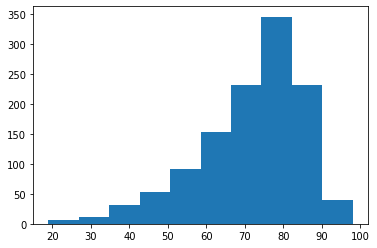

In [ ]:
plt.hist(Critic_Score_sport['Critic_Score'])

(array([   8.,   46.,  159.,  297.,  700., 1085., 1679., 1562., 1140.,
         267.]),
 array([13. , 21.5, 30. , 38.5, 47. , 55.5, 64. , 72.5, 81. , 89.5, 98. ]),
 <a list of 10 Patch objects>)

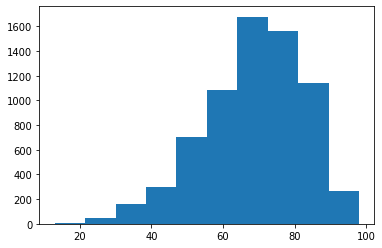

In [ ]:
plt.hist(Critic_Score_over['Critic_Score'])

In [ ]:
from scipy.stats import shapiro

In [ ]:
# Проверка на нормальность распределения тестом Шапиро-Вилка  
alpha = 0.05
stat, p = shapiro(Critic_Score_sport['Critic_Score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Выборка соответствует распределению Гауса (не удается отклонить H0')
else:
	print('Выборка не соответствует распределению Гауса  (отклонить H0)')

Statistics=0.940, p=0.000
Выборка не соответствует распределению Гауса  (отклонить H0)


In [ ]:
# Проверка на нормальность распределения тестом Шапиро-Вилка  
alpha = 0.05
stat, p = shapiro(Critic_Score_over['Critic_Score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Выборка соответствует распределению Гауса (не удается отклонить H0')
else:
	print('Выборка не соответствует распределению Гауса  (отклонить H0)')

Statistics=0.978, p=0.000
Выборка не соответствует распределению Гауса  (отклонить H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import normaltest

In [ ]:
# Проверка на нормальность распределения тестом д'Агостино
alpha = 0.05
stat, p = normaltest(Critic_Score_sport['Critic_Score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Выборка соответствует распределению Гауса (не удается отклонить H0')
else:
	print('Выборка не соответствует распределению Гауса  (отклонить H0)')

Statistics=151.251, p=0.000
Выборка не соответствует распределению Гауса  (отклонить H0)


In [ ]:
# Проверка на нормальность распределения тестом д'Агостино
alpha = 0.05
stat, p = normaltest(Critic_Score_over['Critic_Score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Выборка соответствует распределению Гауса (не удается отклонить H0')
else:
	print('Выборка не соответствует распределению Гауса  (отклонить H0)')

Statistics=325.394, p=0.000
Выборка не соответствует распределению Гауса  (отклонить H0)


In [ ]:
# Тест Левина для проверки равенства дисперсий
alpha = 0.05
test_leven, p = stats.levene(Critic_Score_over['Critic_Score'], Critic_Score_sport['Critic_Score'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=1.199, p-value=0.274
Принять гипотезу о равенстве дисперсий


**T-тест**

In [ ]:
t_test, p = stats.ttest_ind(Critic_Score_sport['Critic_Score'],Critic_Score_over['Critic_Score'],equal_var = False, nan_policy='omit')
print(f'статистика = {t_test} , p = {p}')
if p < 0.05:
  print("Критики в среднем ставят оценки жанру спорт отличную от остальных (выше или неже)")
else:
  print("Критики в среднем ставят такие же оценки жанру спорт как и всем остальным")

статистика = 8.08698828481822 , p = 1.181171308320441e-15
Критики в среднем ставят оценки жанру спорт отличную от остальных (выше или неже)


Вывод:

Учитывая то что средняя оценка критиков жанра Sports одна из самых высоких и тест показал различия между этим жанром и остальными, мы , с вероятностью 95%, можем предположить, что в среднем критики жанру Sports ставят более высокую оценку, чем остальным и Sports спорт им нравиться больше 

**Проанализируем. Критикам нравятся больше игры на PC или на PS4?**

In [ ]:
Critic_Score_platform = Critic_Score.groupby('Platform').mean().sort_values('Critic_Score', ascending= False)

In [ ]:
Critic_Score_platform

,Critic_Score
Platform,
DC,87.357143
PC,75.928671
XOne,73.325444
PS4,72.091270
PS,71.515000
PSV,70.791667
WiiU,70.733333
PS3,70.382927
XB,69.859310


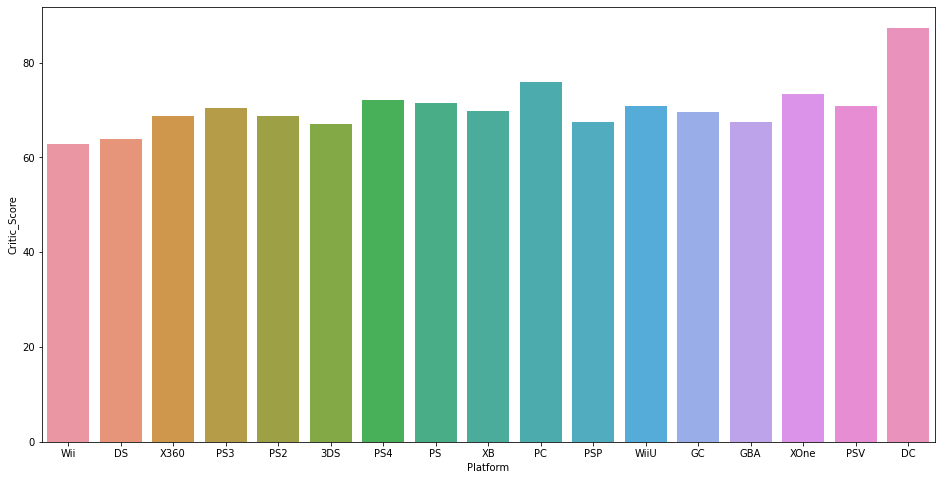

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=Critic_Score['Platform'], y=Critic_Score['Critic_Score'], ci=False,)

In [ ]:
Critic_Score_PC = Critic_Score[Critic_Score['Platform']== 'PC']

In [ ]:
Critic_Score_PS4 = Critic_Score[Critic_Score['Platform']== 'PS4']

H0 В среднем оценки платформ PC и PS4 одинаковы

H1 В среднем оценки платформ PC и PS4 различаются

**T-тест**

In [ ]:
t_test, p = stats.ttest_ind(Critic_Score_PC['Critic_Score'],Critic_Score_PS4['Critic_Score'],equal_var = False, nan_policy='omit')
print(f'статистика = {t_test} , p = {p}')
if p < 0.05:
  print("В среднем оценки платформ PC и PS4 различаются")
else:
  print("В среднем оценки платформ PC и PS4 одинаковы")

статистика = 4.3087588262138725 , p = 2.067249157283479e-05
В среднем оценки платформ PC и PS4 различаются


In [ ]:
plot = Critic_Score.loc[(Critic_Score['Platform'] =='PS4')|(Critic_Score['Platform'] =='PC')]

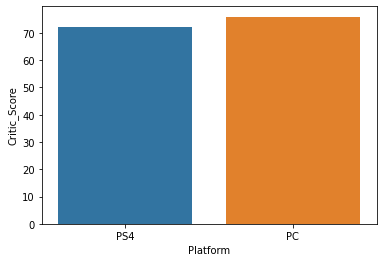

In [ ]:
sns.barplot(x=plot['Platform'], y=plot['Critic_Score'], ci=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


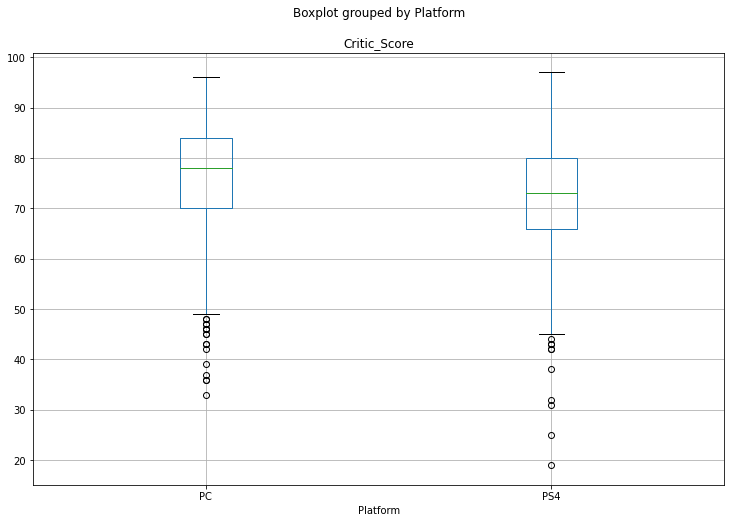

In [ ]:
plot.boxplot('Critic_Score', by='Platform', figsize=(12, 8))

Вывод:

С вероятностью в 95% можем сказать , что игры на ПК критикам нравятся больше

**Проанализируем. Критикам больше нравятся стрелялки или стратегии?**

In [ ]:
Critic_Score_shut_or_strag = Critic_Score.loc[(Critic_Score['Genre'] =='Shooter')|
                                              (Critic_Score['Genre'] =='Strategy')]

In [ ]:
Critic_Score_shut_or_strag.groupby('Genre').mean()

,Critic_Score
Genre,
Shooter,70.181144
Strategy,72.086093


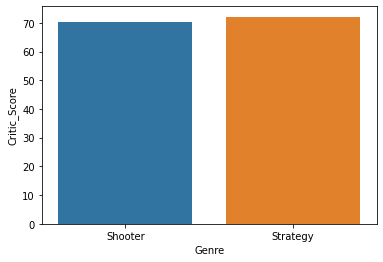

In [ ]:
sns.barplot(x=Critic_Score_shut_or_strag['Genre'],
            y=Critic_Score_shut_or_strag['Critic_Score'], ci=False)

In [ ]:
Critic_Score_shut = Critic_Score_shut_or_strag[Critic_Score_shut_or_strag['Genre'] == 'Shooter']

In [ ]:
Critic_Score_strag = Critic_Score_shut_or_strag[Critic_Score_shut_or_strag['Genre'] == 'Strategy']

H0 В среднем оценки жанров шутер и стратегия не отличаются

H1  В среднем оценки жанров шутер и стратегия отличаются

**T-тест**

In [ ]:
t_test, p = stats.ttest_ind(Critic_Score_shut['Critic_Score'],Critic_Score_strag['Critic_Score'],equal_var = False, nan_policy='omit')
print(f'статистика = {t_test} , p = {p}')
if p < 0.05:
  print("В среднем оценки жанров шутер и стратегия отличаются")
else:
  print("В среднем оценки жанров шутер и стратегия не отличаются")

статистика = -2.2972408230640315 , p = 0.021938989522304823
В среднем оценки жанров шутер и стратегия отличаются


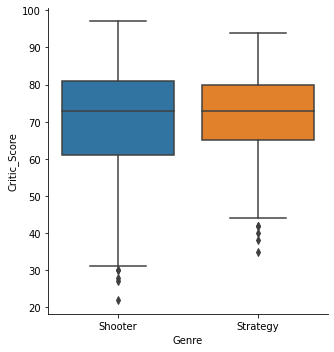

In [ ]:
sns.catplot(x ='Genre', y="Critic_Score",
            data=Critic_Score_shut_or_strag, kind="box",
            height=5, aspect=.95)

Тест показал, что в среднем выборки отличаются, хотя возможно из из-за достаточно большой выборки небольшие отклонения, стали значимы. Разница средних оценок по этим двум жанрам составляет 1.9.
То есть получается что отличие есть , но мы будем определяться значимо оно или нет в зависимости от дальнейших задач. 

#Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

-Привидите весь текст к нижнему регистру;

-Удалите мусорные символы;

-Удалите стоп-слова;

-Привидите все слова к нормальной форме;

-Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:



```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```





Можете поэкспериментировать с параметрами TfidfVectorizer;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
spam = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')

In [ ]:
spam.head()

,Category,Message,category_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
spam_lower = spam['Message'].str.lower()

In [ ]:
spam_lower.head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [ ]:
#функция удаляет символы
def del_trush(row):
    return re.sub('[^a-z0-9 ]+', '', row)

In [ ]:
spam_sub = spam_lower.apply(del_trush)

In [ ]:
spam_sub.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: Message, dtype: object

In [ ]:
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#функция удаляет стоп слова
def stop_words(row):
  text = ''
  for word in row.split():
    if word not in stopwords_set:
      text+= (' '+ word)
  return text

In [ ]:
spam_stop = spam_sub.apply(stop_words)

In [ ]:
spam_stop.head()

0     go jurong point crazy available bugis n great...
1                              ok lar joking wif u oni
2     free entry 2 wkly comp win fa cup final tkts ...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: Message, dtype: object

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
#функция возвращает слова к их нормальной форме
def lem_words(row):
  text = ''
  for word in row.split():
    text+= (' '+ wordnet_lemmatizer.lemmatize(word))
  return text

In [ ]:
spam_lem = spam_stop.apply(lem_words)

In [ ]:
spam_lem.head()

0     go jurong point crazy available bugis n great...
1                              ok lar joking wif u oni
2     free entry 2 wkly comp win fa cup final tkts ...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: Message, dtype: object

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam_lem)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
spam['category_num']=spam['Category'].map({'spam':1, 'ham':0})

In [ ]:
spam.head()

,Category,Message,category_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,spam['category_num'], test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1444,    4],
       [  73,  151]])

Судя по confusion_matrix модель достаточно хорошо обучилась (верные ответы расположены в главной диагонали матрицы)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9539473684210527

In [ ]:
df_y_predict = pd.DataFrame(data = y_pred, columns = ['predict'],index = y_test.index.copy())

In [ ]:
df_out = pd.merge(y_test, df_y_predict, how = 'left', left_index = True, right_index = True)

In [ ]:
df_out.head()

,category_num,predict
3245,0,0
944,0,0
1044,0,0
2484,0,0
812,0,0


In [ ]:
df_res = df_out.loc[df_out['category_num']!=df_out['predict']]

In [ ]:
len(df_res)

77

In [ ]:
res_message = pd.merge(df_res, spam['Message'], left_index=True, right_index=True)

In [ ]:
res_message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 2952 to 305
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category_num  77 non-null     int64 
 1   predict       77 non-null     int64 
 2   Message       77 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [ ]:
res_message.head()

,category_num,predict,Message
2952,0,1,Hey now am free you can call me.
881,1,0,Reminder: You have not downloaded the content ...
1961,1,0,Guess what! Somebody you know secretly fancies...
3864,1,0,Oh my god! I've found your number again! I'm s...
2575,1,0,Your next amazing xxx PICSFREE1 video will be ...
